<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="# Case 2 - Pneumonia X-ray Image Analysis" data-toc-modified-id="Case-X.-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case X. Template</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Modes-and-training" data-toc-modified-id="Modes-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modes and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 2 - Pneumonia X-ray Image Analysis
Samuel Räsänen, Arttu Sundell, Jari Putaansuu<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>
13.02.2020<br>

# Background

The aim of this Notebook is ...

# Data

The data contained ...

In [1]:
%pylab inline
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_dir = "./ChestXRay2017/chest_xray/train"
import os
os.listdir(train_dir)

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [3]:
# All images will be rescaled by 1./255
# The data is split to training and validation sets
# Training data = 80%
# Validation data = 20% (validation split = 0.2)
# https://keras.io/preprocessing/image

train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [4]:
train_generator = train_datagen.flow_from_directory(
    #this is the target directory
    train_dir,
    
    #All images will be resized to 150x150
    target_size = (150, 150),
    
    #We read images in batches
    batch_size = 16,
    
    #Create binary labels
    class_mode = 'binary',
    
    #This will be the training set
    subset = "training")

dev_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary',
    subset = "validation")

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [5]:
# Test that the generator works

i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    i = i+1
    if i > 5:
        break

data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)


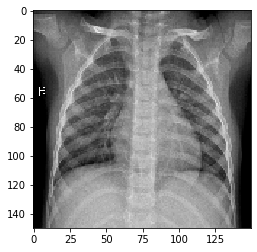

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

In [6]:
# Check the first image from the batch
# Notice that the image has been now resized to 150 x 150 pixels

imshow(data_batch[0])
show()

# Check the last labels batch

labels_batch

In [7]:
# Generating the test set

test_dir = "./ChestXRay2017/chest_xray/test" 
import os
os.listdir(test_dir)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
    #this is the target directory
    test_dir,
    
    #All images will be resized to 150x150
    target_size = (150, 150),
    
    #We read images in batches
    batch_size = 16,
    
    #Create binary labels
    class_mode = 'binary')

Found 624 images belonging to 2 classes.


# Modes and training

The following models were used ...

In [8]:
# Build a simple convolutional neural network (CNN)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

# Let's use slower learning rate than the default rate
# https://keras.io/optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop (lr = 1e-4), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        9

In [ ]:
## Train the network with the training and validation data
# Reading all batches per epoch (steps_per_epoch = None) using all 4187 images
# modigying steps_per_epoch = 10 would result in reading only 10 batches per epoch (10x16 = 160 images per epoch)

# https://keras.io/models/sequential/#fit_generator

history = model.fit_generator(
    train_generator,
    steps_per_epoch = None,
    verbose = 1,
    epochs = 10,
    validation_data = dev_generator,
    validation_steps = None)

# save the model
model.save('case_2_run_1.h5')

Epoch 1/10
119/262 [============>.................] - ETA: 2:34 - loss: 0.5185 - acc: 0.7579

# Results and Discussion

The following results were achieved ...

In [ ]:
# Check the accuracy and loss graphs for the training done

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plot(epochs, acc, 'bo-', label = "Training accuracy")
plot(epochs, val_acc, 'r*-', label = "Validation accuracy")
title('Training and validation accuracy')
grid()
legend()

figure()
plot(epochs, loss, 'bo-', label = "Training loss")
plot(epochs, val_loss, 'r*-', label = "Validation loss")
title('Training and validation loss')
grid()
legend()

show()

In [ ]:
## Test the model accuracy with unseen test data (test_generator)

loss, acc = model.evaluate_generator(test_generator, verbose=1)

# Conclusions

To summarize we found out that ...